## Lab1

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df = df.drop(columns =['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [267]:
names = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]

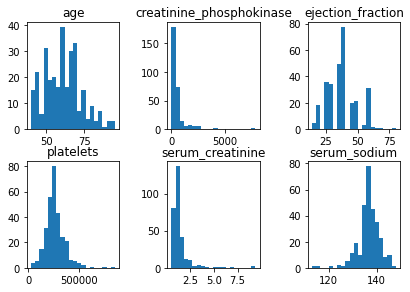

In [268]:
import matplotlib.pyplot as plt

n_bins = 20
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(df[names[i*3+j]].values, bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [269]:
for name in names:
    print("diapason for {}: ({} : {})".format(name, df[name].min(), df[name].max()))

diapason for age: (40.0 : 95.0)
diapason for creatinine_phosphokinase: (23 : 7861)
diapason for ejection_fraction: (14 : 80)
diapason for platelets: (25100.0 : 850000.0)
diapason for serum_creatinine: (0.5 : 9.4)
diapason for serum_sodium: (113 : 148)


In [270]:
for name in names:
    print("most frequent value for {}: {}".format(name, df[name].value_counts().idxmax()))

most frequent value for age: 60.0
most frequent value for creatinine_phosphokinase: 582
most frequent value for ejection_fraction: 35
most frequent value for platelets: 263358.03
most frequent value for serum_creatinine: 1.0
most frequent value for serum_sodium: 136


In [2]:
data = df.to_numpy(dtype='float')
data

array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02],
       ...,
       [4.5000000e+01, 2.0600000e+03, 6.0000000e+01, 7.4200000e+05,
        8.0000000e-01, 1.3800000e+02],
       [4.5000000e+01, 2.4130000e+03, 3.8000000e+01, 1.4000000e+05,
        1.4000000e+00, 1.4000000e+02],
       [5.0000000e+01, 1.9600000e+02, 4.5000000e+01, 3.9500000e+05,
        1.6000000e+00, 1.3600000e+02]])

### Стандартизация данных

In [272]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

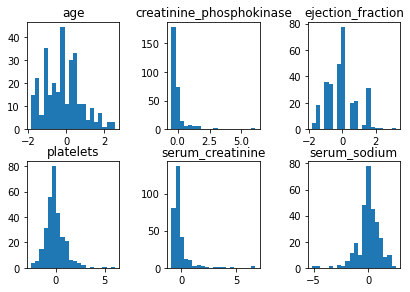

In [273]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

Стандартизация приводит все исходные значения набора данных,
независимо от их начальных распределений и единиц измерения,
к набору значений из распределения с нулевым средним и
стандартным отклонением, равным 1. В результате формируется
так называемая стандартизированная шкала, которая определяет
место каждого значения в наборе данных, измеряя его
отклонение от среднего в единицах стандартного отклонения.

In [274]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("МО before стандарт.: {}".format(np.mean(data[:,i])))
    print("СКО before стандарт.: {}".format(np.std(data[:,i])))
    print("МО after стандарт.: {}".format(np.mean(data_scaled[:,i])))
    print("СКО after стандарт.: {}".format(np.std(data_scaled[:,i])))
    print()

For age:
МО before стандарт.: 60.83389297658862
СКО before стандарт.: 11.874901429842655
МО after стандарт.: -0.16970362369106984
СКО after стандарт.: 0.9538237876978354

For creatinine_phosphokinase:
МО before стандарт.: 581.8394648829432
СКО before стандарт.: 968.6639668032415
МО after стандарт.: -0.021276750290383013
СКО after стандарт.: 0.8141790488228113

For ejection_fraction:
МО before стандарт.: 38.08361204013378
СКО before стандарт.: 11.815033462318585
МО after стандарт.: 0.01050249484809085
СКО after стандарт.: 0.9061082161919123

For platelets:
МО before стандарт.: 263358.02926421404
СКО before стандарт.: 97640.54765451424
МО after стандарт.: -0.035228788194085287
СКО after стандарт.: 1.0150611342848024

For serum_creatinine:
МО before стандарт.: 1.3938795986622072
СКО before стандарт.: 1.0327786652795918
МО after стандарт.: -0.10864080163893569
СКО after стандарт.: 0.8854288727548568

For serum_sodium:
МО before стандарт.: 136.62541806020067
СКО before стандарт.: 4.40509237

Формулы для каждого признака:
yi = (xi - M) / o

In [275]:
for i in range(6):
    print("yi=(xi - {}) / {}".format(np.mean(data[:,i]), np.std(data[:,i])))

yi=(xi - 60.83389297658862) / 11.874901429842655
yi=(xi - 581.8394648829432) / 968.6639668032415
yi=(xi - 38.08361204013378) / 11.815033462318585
yi=(xi - 263358.02926421404) / 97640.54765451424
yi=(xi - 1.3938795986622072) / 1.0327786652795918
yi=(xi - 136.62541806020067) / 4.405092379513557


In [276]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("MO: {}".format(scaler.mean_[i]))
    print("Дисп: {}".format(scaler.var_[i]))
    print()

For age:
MO: 62.946666666666665
Дисп: 154.99715555555557

For creatinine_phosphokinase:
MO: 607.1533333333333
Дисп: 1415488.8231555554

For ejection_fraction:
MO: 37.946666666666665
Дисп: 170.02382222222224

For platelets:
MO: 266746.74946666666
Дисп: 9252860499.078917

For serum_creatinine:
MO: 1.5206000000000002
Дисп: 1.3605269733333336

For serum_sodium:
MO: 136.45333333333335
Дисп: 20.607822222222225



In [277]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [278]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("МО before стандарт.: {}".format(np.mean(data[:,i])))
    print("СКО before стандарт.: {}".format(np.std(data[:,i])))
    print("МО after стандарт.: {}".format(np.mean(data_scaled[:,i])))
    print("СКО after стандарт.: {}".format(np.std(data_scaled[:,i])))
    print()

For age:
МО before стандарт.: 60.83389297658862
СКО before стандарт.: 11.874901429842655
МО after стандарт.: 5.703353062957326e-16
СКО after стандарт.: 0.9999999999999998

For creatinine_phosphokinase:
МО before стандарт.: 581.8394648829432
СКО before стандарт.: 968.6639668032415
МО after стандарт.: 0.0
СКО after стандарт.: 1.0

For ejection_fraction:
МО before стандарт.: 38.08361204013378
СКО before стандарт.: 11.815033462318585
МО after стандарт.: -3.267546025652635e-17
СКО after стандарт.: 1.0

For platelets:
МО before стандарт.: 263358.02926421404
СКО before стандарт.: 97640.54765451424
МО after стандарт.: 7.723290606088045e-17
СКО after стандарт.: 1.0

For serum_creatinine:
МО before стандарт.: 1.3938795986622072
СКО before стандарт.: 1.0327786652795918
МО after стандарт.: 1.4258382657393315e-16
СКО after стандарт.: 1.0

For serum_sodium:
МО before стандарт.: 136.62541806020067
СКО before стандарт.: 4.405092379513557
МО after стандарт.: -8.673849449914267e-16
СКО after стандарт.: 

In [279]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("MO: {}".format(scaler.mean_[i]))
    print("Дисп: {}".format(scaler.var_[i]))
    print()


For age:
MO: 60.83389297658862
Дисп: 141.01328396847913

For creatinine_phosphokinase:
MO: 581.8394648829432
Дисп: 938309.8805829913

For ejection_fraction:
MO: 38.08361204013378
Дисп: 139.5950157157079

For platelets:
MO: 263358.02926421404
Дисп: 9533676546.273466

For serum_creatinine:
MO: 1.3938795986622072
Дисп: 1.066631771456695

For serum_sodium:
MO: 136.62541806020067
Дисп: 19.404838872048412



### Приведение к диапазону

In [280]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

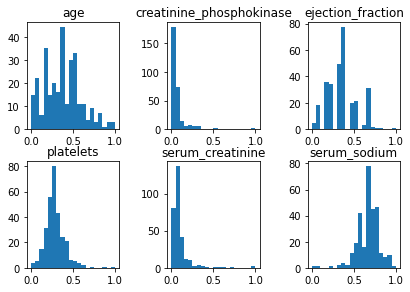

In [281]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_min_max_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [282]:
min_max_scaler.data_max_

array([9.500e+01, 7.861e+03, 8.000e+01, 8.500e+05, 9.400e+00, 1.480e+02])

In [283]:
min_max_scaler.data_min_

array([4.00e+01, 2.30e+01, 1.40e+01, 2.51e+04, 5.00e-01, 1.13e+02])

In [284]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

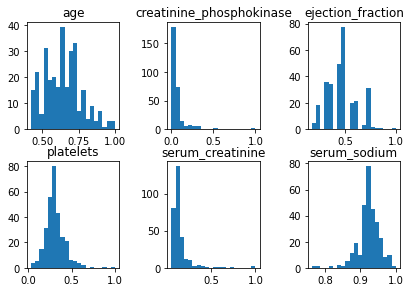

In [285]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_max_abs_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [286]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)

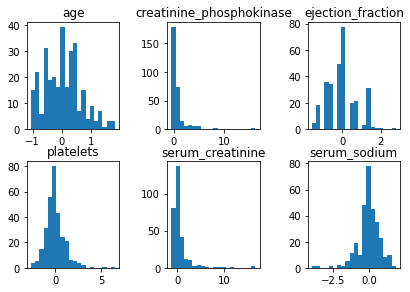

In [287]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_robust_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [288]:
class MyScaler:
    def __init__(self):
        self.a = -5
        self.b = 10
        self.max = []
        self.min = []

    def fit(self, data):
        for i in range(data.shape[1]):
            self.min.append(np.min(data[:, i]))
            self.max.append(np.max(data[:, i]))
        return self

    def transform(self, data):
        scl_data = data.copy()
        for i in range(data.shape[1]):
                scl_data[:, i] =  (data[:, i] - self.min[i]) / (self.max[i] - self.min[i])
                scl_data[:, i] = (scl_data[:, i] * (self.b - self.a)) + self.a
        return scl_data

In [289]:
my_scaler = MyScaler().fit(data)
data_my_scaled = my_scaler.transform(data)

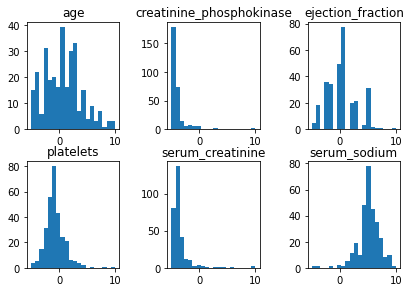

In [290]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_my_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

### Нелинейные преобразования

In [305]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

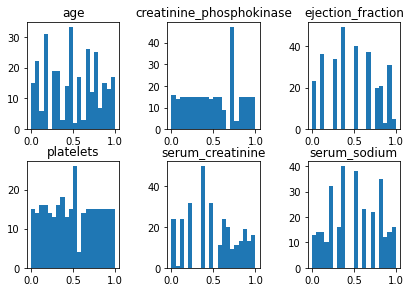

In [304]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_quantile_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [293]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,random_state=0, output_distribution="normal").fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

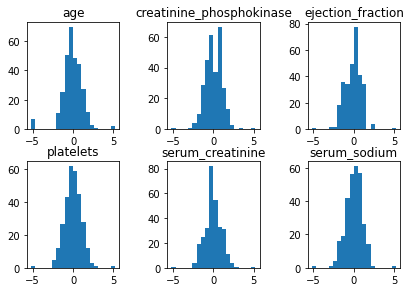

In [294]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_quantile_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [295]:
power_transformer = preprocessing.PowerTransformer().fit(data)
data_power_scaled = power_transformer.transform(data)

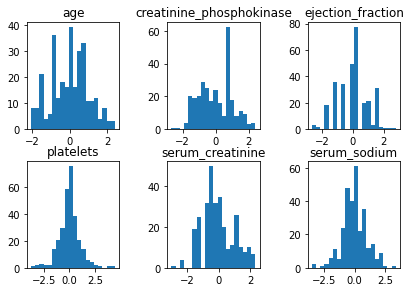

In [296]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data_power_scaled[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

### Дискретизация

In [297]:
bins = [3, 4, 3, 10, 2, 4]
discretizer = preprocessing.KBinsDiscretizer(n_bins=bins, encode='ordinal')
discrete_data = discretizer.fit_transform((data), 'discr')

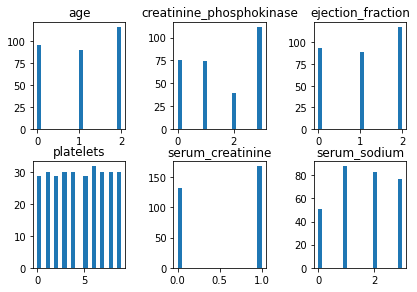

In [298]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axs[i, j].hist(discrete_data[:,i*3+j], bins=n_bins)
        axs[i, j].set_title(names[i*3+j])

plt.show()

In [306]:
discretizer.bin_edges_

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)